In [1]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.
C:\Users\pooja\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\pooja\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\pooja\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\pooja\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

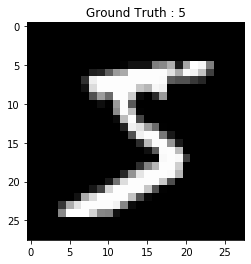

In [2]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
plt.show()

In [3]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print("Dim data:",dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

Dim data: 784



Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 10s 167us/step - loss: 0.2710 - accuracy: 0.9156 - val_loss: 0.1882 - val_accuracy: 0.9411
Epoch 2/3
60000/60000 [==============================] - 9s 151us/step - loss: 0.0914 - accuracy: 0.9715 - val_loss: 0.1063 - val_accuracy: 0.9659
Epoch 3/3
60000/60000 [==============================] - 9s 151us/step - loss: 0.0591 - accuracy: 0.9812 - val_loss: 0.0806 - val_accuracy: 0.9762
Class:  7


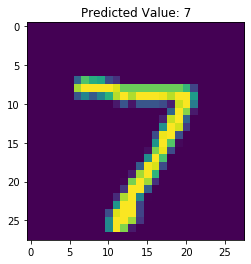

Class:  2


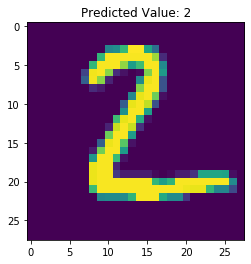

Class:  1


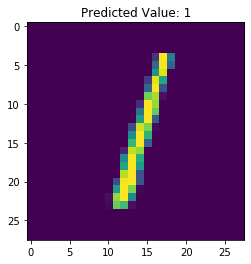

Class:  0


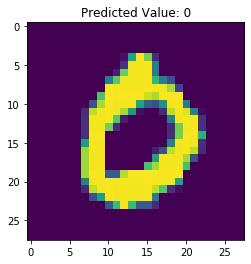

In [4]:

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=3, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

for i in range(4):
    img = test_data[i]
    test_img = img.reshape((1,784))
    img_class = model.predict_classes(test_img)
    prediction = img_class[0]
    classname = img_class[0]
    print("Class: ",classname)
    img = img.reshape((28,28))
    plt.imshow(img)
    plt.title("Predicted Value: "+str(classname))
    plt.show()


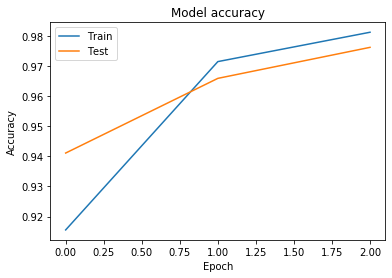

In [5]:
print(history)
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

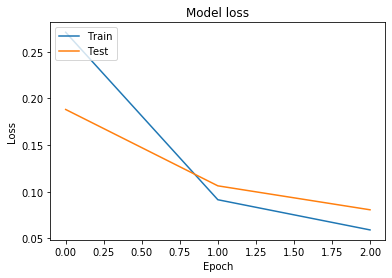

10000/10000 [==============================] - 2s 205us/step
Evaluation result on Test Data : Loss = 0.08062970888856798, accuracy = 0.9761999845504761


In [6]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))